# EDA after Initial Modelling

This notebook explores the biases in the cleaned  dataset. Because all of the initial models (Linear Regression, Lasso, Ridge, Decision Tree Regressor, Neural Network Regressor showed less than 0.2 of training r2 and test r2, outliers as well as the linear model assumptions are more rigexamined.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
clean_real_estate = pd.read_csv('../Datasets/cleaned_data.csv')
clean_real_estate = clean_real_estate.reset_index(drop=True)
clean_real_estate.info()

/var/folders/kv/4xjj0g696_lcyc7ms5pdd2t00000gn/T/ipykernel_29888/210281347.py:1: DtypeWarning: Columns (9,10,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  clean_real_estate = pd.read_csv('../Datasets/cleaned_data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997193 entries, 0 to 997192
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        997193 non-null  int64  
 1   Serial Number     997193 non-null  int64  
 2   List Year         997193 non-null  int64  
 3   Date Recorded     997193 non-null  object 
 4   Town              997193 non-null  object 
 5   Address           997144 non-null  object 
 6   Assessed Value    997193 non-null  float64
 7   Sale Amount       997193 non-null  float64
 8   Sales Ratio       997193 non-null  float64
 9   Property Type     614751 non-null  object 
 10  Residential Type  608889 non-null  object 
 11  Non Use Code      245326 non-null  float64
 12  Assessor Remarks  149858 non-null  object 
 13  OPM remarks       9916 non-null    object 
 14  Location          197691 non-null  object 
 15  Full Address      979476 non-null  object 
 16  latitude          44

In [55]:
clean_real_estate.boxplot(column  = "Sales Ratio")

<Axes: >

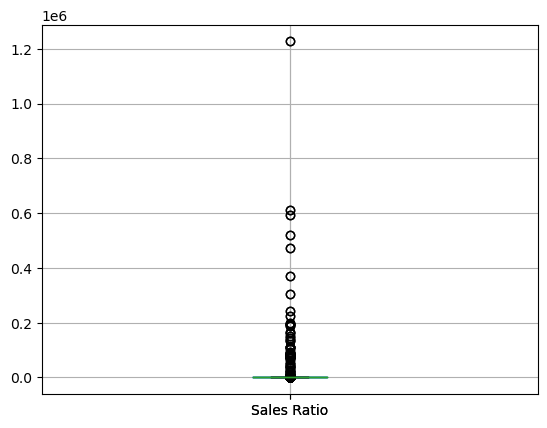

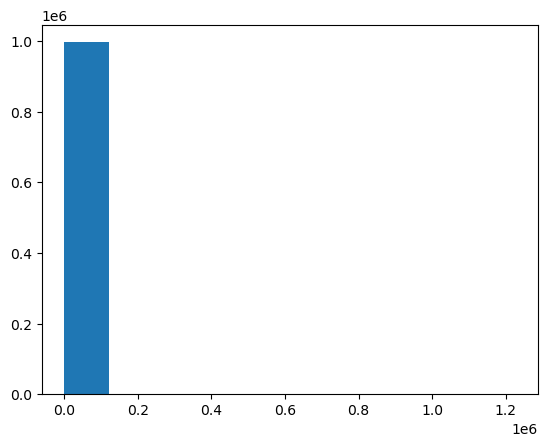

In [56]:
x = clean_real_estate["Sales Ratio"]
plt.figure()
plt.hist(x)
plt.show()

In [57]:
clean_real_estate["Sales Ratio"].mean()
clean_real_estate["Sales Ratio"].mode()
clean_real_estate["Sales Ratio"].max()

1226420.0

In [48]:
(clean_real_estate[clean_real_estate["Sales Ratio"]>10]).shape[0]/clean_real_estate.shape[0]

0.008989232776403365

In [58]:
crazy_ratio_rows = clean_real_estate[clean_real_estate["Sales Ratio"]>1000000]

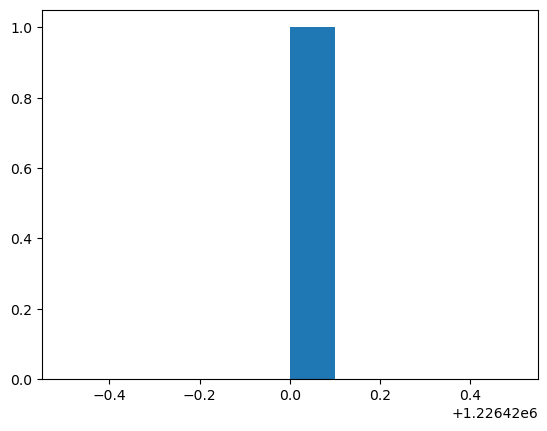

In [59]:
plt.figure()
plt.hist(crazy_ratio_rows["Sales Ratio"])
plt.show()

In [61]:
crazy_ratio_rows

,Unnamed: 0,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Full Address,latitude,longitude,month_recorded,year_recorded
710637,175337,60043,2006,2007-03-19,Salisbury,209 MAIN ST,1226420.0,1.0,1226420.0,Single Family,Single Family,29.0,NaN,NaN,POINT (-73.43333 41.97247),"209, Main St, Salisbury, Connecticut, United S...",-73.43333,41.97247,3.0,2007.0


Although this is an extreme outlier case, more outliers need to be rid of because the initial modeling failed.